# Método de Newton

## Método de Newton é outro algoritmo de otimização que diferentes dos outros, usa a segunda derivada como informação para obter uma convergência mais rápida.

## Dua forma é similar ao do gradiente Descendente, com uma única diferença,

## $w_i = w_{i-1} - \alpha \frac{dL}{dw}/\nabla^2L $

## sendo $\nabla^2L$ a matriz hessiana da função de custo.

In [56]:
import numpy as np 
import matplotlib.pyplot as plt
import sys

In [59]:
f = lambda x,w: x @ w # Função que descreve uma parabola para o nosso caso, em que temos
# f: X[:,0]*w[0] + X[:,1]*w[1] + X[:,2]*w[2]

w = np.random.normal(0,1,(3,1)) # pesos

X = np.arange(-20,20,0.1).reshape(-1,1) # dados

y = X**2 + 5*X + 1 # função a ser encontrada, que não conhecemos, porém sabemos é uma função polinomial 

X_in = np.append(X**2,np.append(X,np.ones(X.shape),axis = 1),axis = 1).reshape(-1,3) # adicionando 1 para poder fazer o produto interno ao invés de multiplicações
print(X_in)

[[400.   -20.     1.  ]
 [396.01 -19.9    1.  ]
 [392.04 -19.8    1.  ]
 ...
 [388.09  19.7    1.  ]
 [392.04  19.8    1.  ]
 [396.01  19.9    1.  ]]


In [60]:
def newton(X,y,w,lr =0.000001):
    for _ in range(1000):
        yhat = f(X,w)
        loss1 = np.mean((y - yhat)**2)
        for i in range(len(w)):
            w[i][0] += (lr*(y-yhat).T @ X[:,i])/len(yhat)/(-np.mean(X[:,1]))
        print('loss:',loss1)

    return w.reshape(-1,1)

In [62]:
for i in range(2):
    w = newton(X_in,y,w)
    print(w)

loss: 13.298096925349512
loss: 13.227281502947887
loss: 13.156843228363655
loss: 13.086780092987565
loss: 13.01709009890732
loss: 12.947771258851622
loss: 12.878821596132575
loss: 12.810239144589868
loss: 12.742021948534507
loss: 12.674168062693097
loss: 12.606675552152238
loss: 12.539542492303799
loss: 12.472766968789266
loss: 12.40634707744594
loss: 12.34028092425209
loss: 12.274566625273273
loss: 12.209202306608372
loss: 12.144186104336313
loss: 12.079516164462943
loss: 12.015190642867909
loss: 11.95120770525251
loss: 11.887565527086897
loss: 11.8242622935585
loss: 11.76129619951974
loss: 11.69866544943724
loss: 11.636368257339978
loss: 11.57440284676875
loss: 11.512767450725386
loss: 11.451460311622414
loss: 11.39047968123274
loss: 11.329823820640236
loss: 11.269491000189587
loss: 11.209479499437457
loss: 11.149787607103079
loss: 11.090413621019739
loss: 11.031355848085964
loss: 10.97261260421757
loss: 10.91418221429928
loss: 10.856063012137161
loss: 10.798253340411144
loss: 10.740

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22564\114921461.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w[i][0] += (lr*(y-yhat).T @ X[:,i])/len(yhat)/(-np.mean(X[:,1]))


Pesos finais:  [1.00022872 4.99849929 0.94487986]


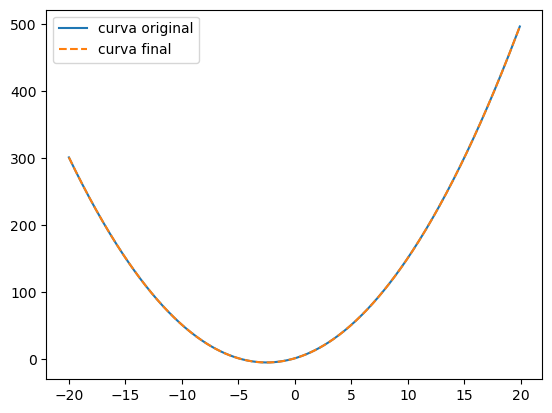

In [63]:
print('Pesos finais: ', w.flatten())
plt.plot(X,y,label = 'curva original')
plt.plot(X,f(X_in,w),'--',label = 'curva final')
plt.legend()

## ë possível notar que foram necessárias iterações muito menores, sem contar que a taxa de aprendizado é extremamente pequena!!!